# DATA UNDERSTANDING ANALYSIS ON THE VODAFONE TRAJ 5 MIN TABLE

In [2]:
stop = "5"

**IMPORT LIBRARIES**

In [3]:
# psycopg2 is a library to execute sql queries in python
import psycopg2
# folium allows to visualize geolocalized data with the jupyter notebook
import folium
from folium.plugins import MarkerCluster
# sys is required to use the open function to write on file
import sys
# pandas is needed to read the csv file and to perform some basic operations on dataframes
import pandas as pd
# matplotlib is used to draw graphs
import matplotlib.pyplot as plt
# numpy is for scinetific computations
import numpy as np
# ST_AsGeoJSON returns a json object, so we can use json.load to parse it
import json

**CONNECT TO THE DATASET**

In [8]:
conn = psycopg2.connect(dbname, host=host, user=user, password=password, port=port)

# the cursor allows Python code to execute PostgreSQL command in a database session.
cur = conn.cursor()

Some vehicles IDs are: 
- "14710_129450", Van
- "3270_79350", Van
- "4550_88640", Van


- "10010_157940", Truck 3
- "10020_95210", Truck 3


- "10320_103980", Truck 3 ax.
- "11150_103360", Truck 3 ax.


- "2430_102500", Fridge Truck
- "2430_157510", Fridge Truck


- "11510_80900", Flatbed truck
- "18950_125130", Flatbed truck


- "19090_162810", Truck
- "7070_95780", Truck

## WARNING! Do not run each time, very long!

**Count the number of trajectories**

In [4]:
cur.execute("SELECT count(*) FROM tak.vodafone_zel1_traj_5min")

In [5]:
for f in cur:
    print("There are", f, "different trajectories.")

There are (24263024,) different trajectories.


**Count the number of distinct vehicles**

In [6]:
cur.execute("SELECT count( distinct (vehicle)) FROM tak.vodafone_zel1_traj_5min")

In [7]:
for f in cur:
    print("Those trajectories are performed by", f, "different vehicles.")

Those trajectories are performed by (6558,) different vehicles.


### Count and save the values of distinct vehicles IDs

In [9]:
query1 = "SELECT vehicle, COUNT(*) as n_traj, vehicletype FROM tak.vodafone_zel1_traj_"+stop+"min GROUP BY vehicle, vehicletype ORDER BY n_traj DESC"

# Store result in csv file to perform then other experiments
outputquery = "COPY ({0}) TO STDOUT WITH CSV HEADER".format(query1)

with open('../../../datasets/in/Traj'+stop+'min/vehicle_list.csv', 'w', encoding='utf-8') as f:
    cur.copy_expert(outputquery, f)

**Count the number of distinct companies**

In [8]:
cur.execute("SELECT count( distinct (company)) FROM tak.vodafone_zel1_traj_5min")

In [9]:
for f in cur:
    print("The vehicles belog to ", f, "different companies.")

The vehicles belog to  (1859,) different companies.


**Count and print the values of distinct vehicletypes**

In [50]:
cur.execute("SELECT vehicletype, COUNT(*) as count FROM tak.vodafone_zel1_traj_5min GROUP BY vehicletype ORDER BY count DESC")

In [51]:
ar = []

for f in cur:
    ar.append(list(f))

In [52]:
ar

[['Van', 14851443],
 ['Truck 3', 7815622],
 ['Truck 3 ax.', 1556503],
 ['Fridge truck', 19843],
 ['Flatbed truck', 15951],
 ['Truck', 3662]]

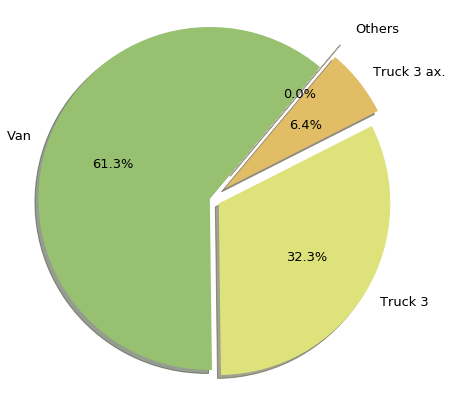

In [5]:
fig = plt.figure(figsize=(7, 7)) 
fig_dims = (1, 1)

ax = plt.subplot2grid(fig_dims, (0, 0))
labels = 'Van', 'Truck 3','Truck 3 ax.', 'Others'
sizes = [14851443, 7815622, 1556503, 39.456]
explode = (0.01, 0.05, 0.1, 0.2)
c = ["#97c170", "#dde37a", "#e1bd66", "#EAC435"]
inside, texts, ltexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 

plt.savefig('../../../thesis/images/Traj5_vehicletype.png', format='png', bbox_inches='tight')

**Find the max length of a trajectory performed by any vehicle**

In [12]:
cur.execute("SELECT max(length) FROM tak.vodafone_zel1_traj_5min")

In [13]:
for f in cur:
    print("The longest trajectory ever performed lasted for", f, "km")

The longest trajectory ever performed lasted for (Decimal('1590.9260644257565'),) km


**Find the max duration of a trajectory performed by any vehicle**

In [14]:
cur.execute("SELECT max(duration) FROM tak.vodafone_zel1_traj_5min")

In [15]:
for f in cur:
    print("The longest trajectory ever performed lasted for", f, "seconds")

The longest trajectory ever performed lasted for (Decimal('115133.53'),) seconds


**Find the timestamp for the first trajectory point recorded**

In [16]:
cur.execute("SELECT min(start_time) FROM tak.vodafone_zel1_traj_5min")

In [17]:
for f in cur:
    print("The first point recorded was on the", f)

The first point recorded was on the (datetime.datetime(2017, 6, 1, 0, 0),)


**Find the timestamp for the last trajectory point recorded**

In [18]:
cur.execute("SELECT max(end_time) FROM tak.vodafone_zel1_traj_5min")

In [19]:
for f in cur:
    print("The last point recorded was on the", f)

The last point recorded was on the (datetime.datetime(2018, 6, 30, 23, 59, 59),)


### !! CLOSE THE CONNECTION WHEN YOU FINISH !!

In [7]:
conn.close()